In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# save feature names  and their dtype (initial) into excel file
#df.dtypes.apply(lambda x: 'categorical' if x == 'object' else 'numerical').sort_values().to_excel('data/old_features_ames.xlsx')

In [6]:
df_null_details = (df.isnull().sum() * 100) / df.shape[0]
df_null_details[df_null_details > 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Alley: missing == 'No Alley'  
FireplaceQu: missing == 'No Fireplace'  
PoolQC: missing == 'No Pool'  
Fence: missing == 'No Fence'  
MiscFeature: missing == 'No MiscFeature'  

'PoolQC' and 'MiscFeature' have less than 5% minority category values. ('PoolQC' have less than than 0.5%).  
Drop 'PoolQC' now, examine 'MiscFeature' later in bivariate.

In [6]:
df.drop(columns=['Id','PoolQC'], inplace=True)

In [7]:
num_columns = df.select_dtypes(include=np.number).columns.tolist()
len(num_columns)

37

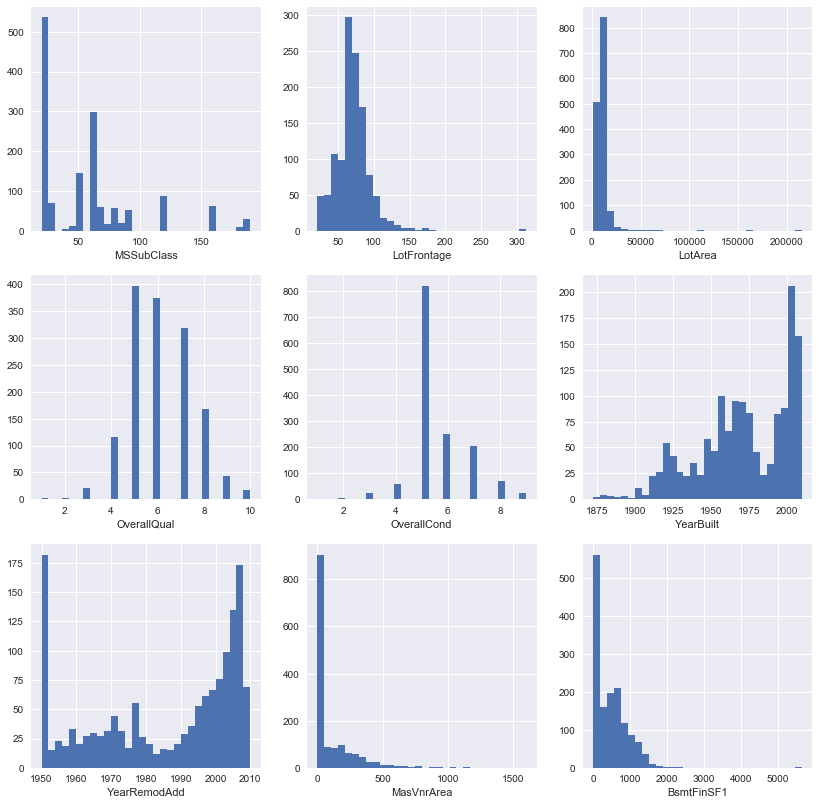

In [9]:
fig = plt.figure(figsize=(14,14))

for i in range(1,10):
    ax = fig.add_subplot(3,3,i)
    plt.hist(df[num_columns[i-1]].dropna(), bins=30)
    ax.set_xlabel(num_columns[i-1])

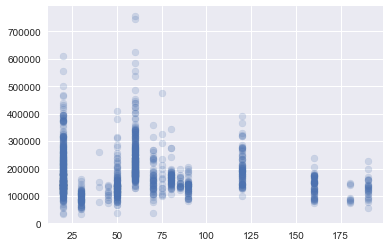

In [10]:
plt.scatter(x='MSSubClass', y='SalePrice', data=df, alpha=0.2)

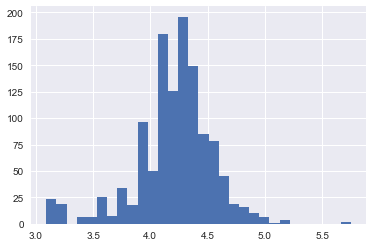

In [11]:
df['LotFrontage'].apply(lambda x: np.log(x+1)).hist(bins=30)

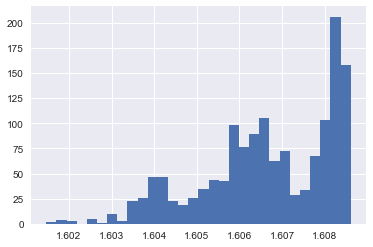

In [41]:
df['YearBuilt'].apply(lambda x: x**(1/16)).hist(bins=30)

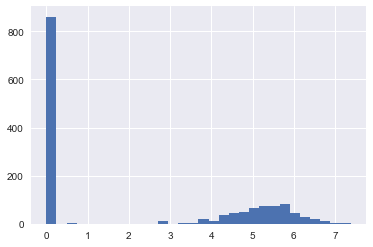

In [9]:
df['MasVnrArea'].apply(lambda x: np.log(x+1)).hist(bins=30)

'MSSubClass' needs to be converted into nominal feature.  
'LotArea', 'LotFrontage' : Log Transformation.  
'YearBuilt', 'YearRemodAdd': Hopeless

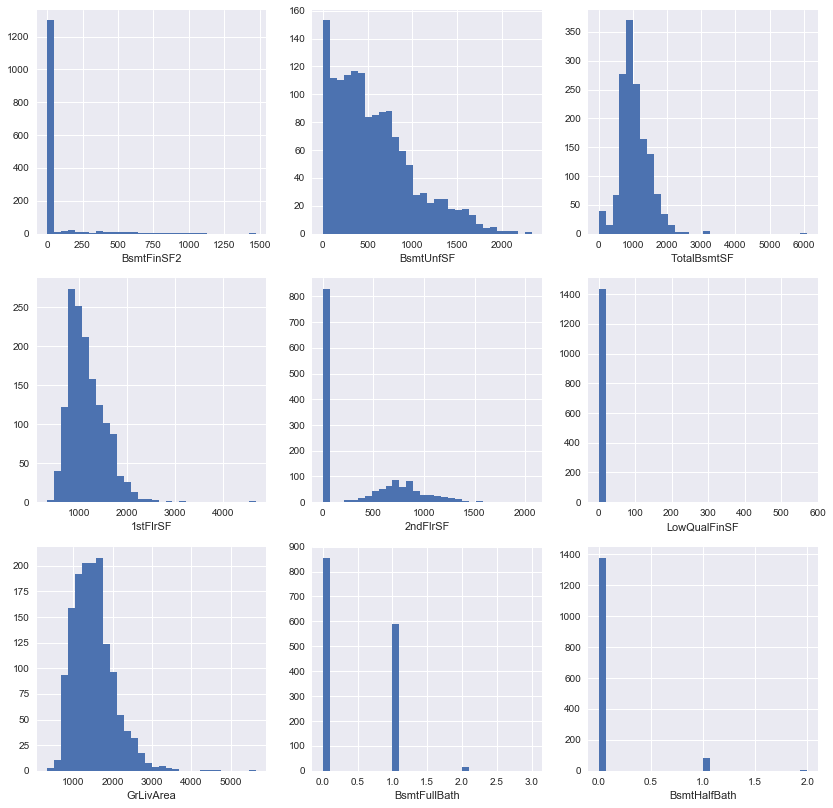

In [44]:
fig = plt.figure(figsize=(14,14))

for i in range(1,10):
    ax = fig.add_subplot(3,3,i)
    plt.hist(df[num_columns[i-1+9]].dropna(), bins=30)
    ax.set_xlabel(num_columns[i-1+9])

In [50]:
(df['BsmtFinSF'] == 0).sum()/df.shape[0]

0.8856164383561644

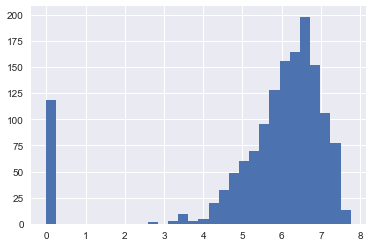

In [53]:
df['BsmtUnfSF'].apply(lambda x: np.log(x+1)).hist(bins=30)

In [14]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
xx = pt.fit_transform([df['BsmtUnfSF']])

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:2778: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [16]:
xx[0].min(), xx[0].max()

(0.0, 4.0901685559128433e+27)

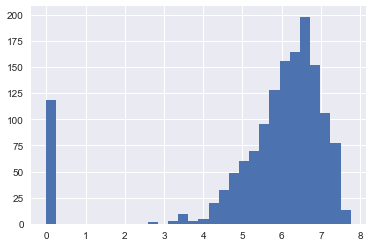

In [17]:
df['BsmtUnfSF'].apply(lambda x: np.log(x+1)).hist(bins=30)

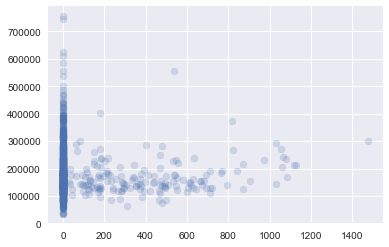

In [72]:
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=df, alpha=0.2)

In [20]:
((df['BsmtUnfSF'] / df['TotalBsmtSF'].apply(lambda x: x+1)) > 1).sum()

0

In [23]:
(df['LowQualFinSF'] != 0).sum()/1460

0.01780821917808219

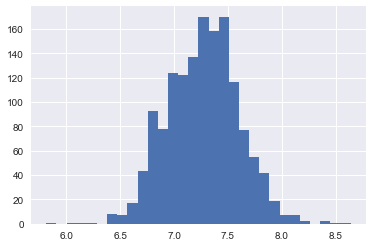

In [25]:
df['GrLivArea'].apply(lambda x: np.log(x+1)).hist(bins=30)

Drop 'LowQualFinSF'  


In [8]:
df.drop(columns=['LowQualFinSF'], inplace=True)

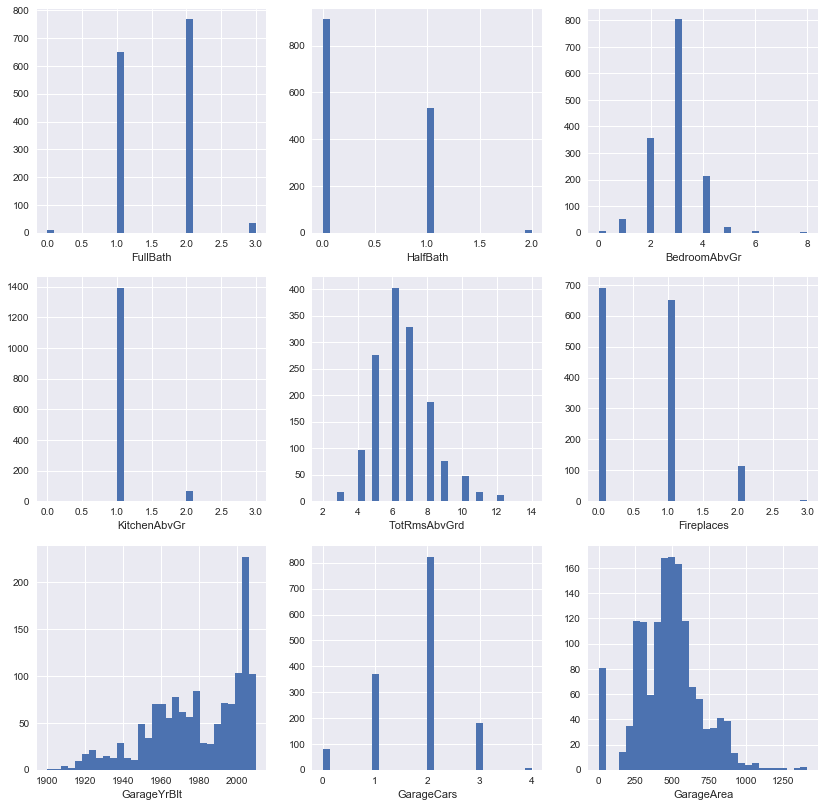

In [27]:
fig = plt.figure(figsize=(14,14))

for i in range(1,10):
    ax = fig.add_subplot(3,3,i)
    plt.hist(df[num_columns[i-1+9*2]].dropna(), bins=30)
    ax.set_xlabel(num_columns[i-1+9*2])

In [29]:
((df['TotRmsAbvGrd'] - df['BedroomAbvGr']) < 0).sum()

0

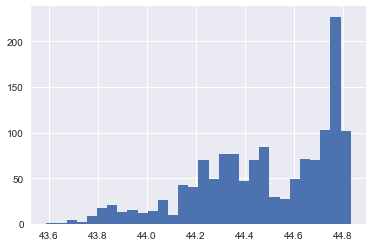

In [38]:
np.sqrt(df['GarageYrBlt']).hist(bins=30)

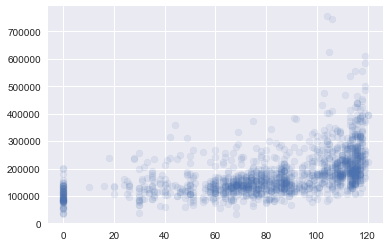

In [46]:
plt.scatter(x=(df['GarageYrBlt']-1890).fillna(0), y=df['SalePrice'], alpha=0.1)

For GarageYrBlt fillna missing values with 1890 and then subtract 1890 from all values to get above relation.

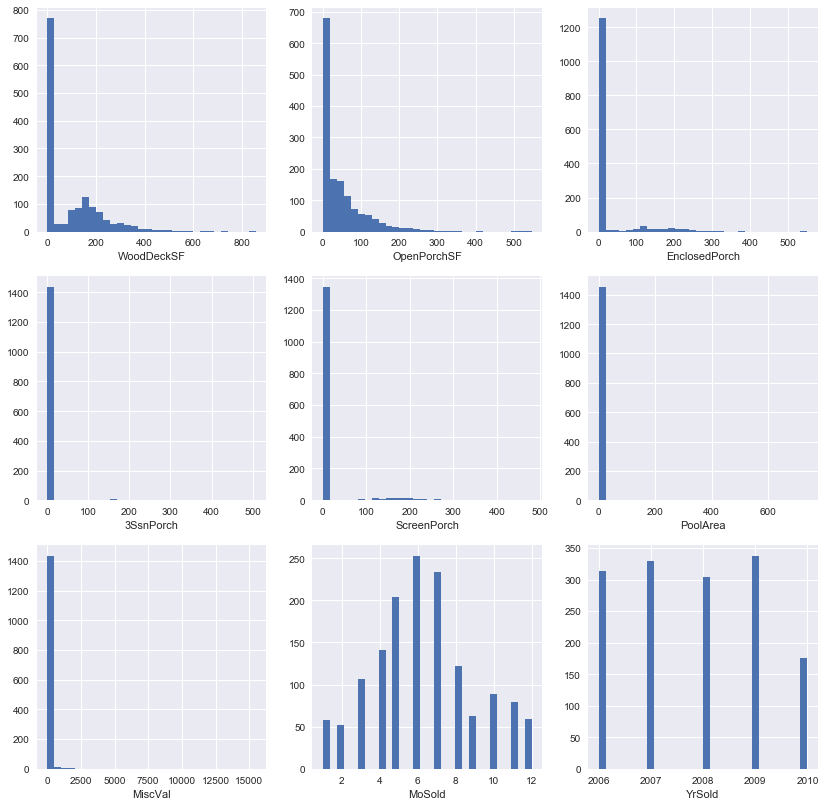

In [11]:
fig = plt.figure(figsize=(14,14))

for i in range(1,10):
    ax = fig.add_subplot(3,3,i)
    plt.hist(df[num_columns[i-1+9*3]].dropna(), bins=30)
    ax.set_xlabel(num_columns[i-1+9*3])

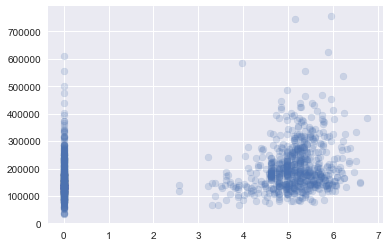

In [15]:
plt.scatter(df['WoodDeckSF'].apply(lambda x: np.log(x+1)), df['SalePrice'], alpha=0.2)

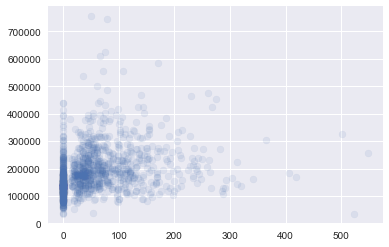

In [20]:
plt.scatter(df['OpenPorchSF'], df['SalePrice'], alpha=0.1)

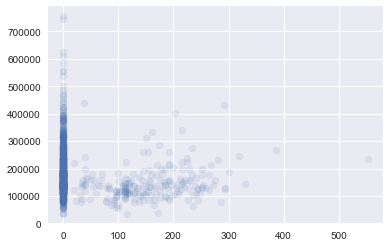

In [21]:
plt.scatter(df['EnclosedPorch'], df['SalePrice'], alpha=0.1)

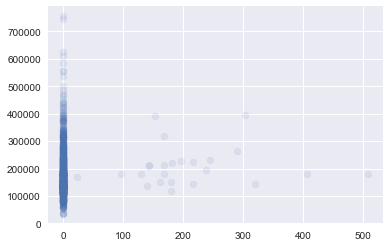

In [22]:
plt.scatter(df['3SsnPorch'], df['SalePrice'], alpha=0.1)

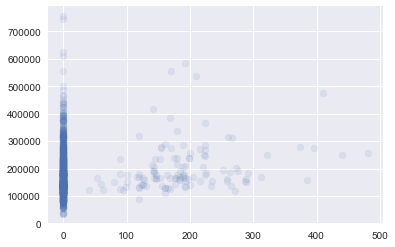

In [23]:
plt.scatter(df['ScreenPorch'], df['SalePrice'], alpha=0.1)

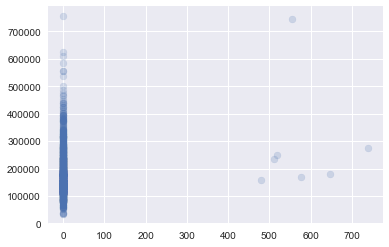

In [25]:
plt.scatter(df['PoolArea'], df['SalePrice'], alpha=0.2)

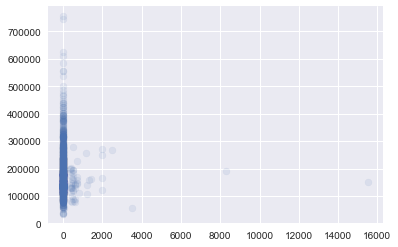

In [26]:
plt.scatter(df['MiscVal'], df['SalePrice'], alpha=0.1)

In [30]:
#drop these features
num_columns[27:34]

['WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

Convert 'MoSold' into categorical

### Guidelines for 'exploration2.ipynb':  
  
Drop columns as mentioned in excel sheet.  
convert 'MSSubClass' and 'MoSold' into categorical.